<a href="https://colab.research.google.com/github/dev4105/Quorum_sensingCrispri/blob/main/Hill_Model_Fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hill Model Fitting




In [ ]:
# Load packages used in this notebook
import os
import json
import shutil
import urllib.request
import pandas as pd

In [ ]:
# Install package CmdStanPy
!pip install --upgrade cmdstanpy

In [ ]:

# Install pre-built CmdStan binary
# (faster than compiling from source via install_cmdstan() function)
tgz_file = 'colab-cmdstan-2.23.0.tar.gz'
tgz_url = 'https://github.com/stan-dev/cmdstan/releases/download/v2.23.0/colab-cmdstan-2.23.0.tar.gz'
if not os.path.exists(tgz_file):
    urllib.request.urlretrieve(tgz_url, tgz_file)
    shutil.unpack_archive(tgz_file)

In [ ]:
# Specify CmdStan location via environment variable
os.environ['CMDSTAN'] = './cmdstan-2.23.0'
# Check CmdStan path
from cmdstanpy import CmdStanModel, cmdstan_path
cmdstan_path()

'cmdstan-2.23.0'

In [ ]:
import cmdstanpy as stan
from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
!pip install cmdstanpy
!pip install cmdstan



ERROR: Could not find a version that satisfies the requirement cmdstan (from versions: none)
ERROR: No matching distribution found for cmdstan


In [ ]:
from cmdstanpy import install_cmdstan
install_cmdstan()


CmdStan install directory: /root/.cmdstan
Installing CmdStan version: 2.35.0
Download successful, file: /tmp/tmpyyqudz2p
Extracting distribution


DEBUG:cmdstanpy:cmd: make build -j1
cwd: None


Unpacked download as cmdstan-2.35.0
Building version cmdstan-2.35.0, may take several minutes, depending on your system.


DEBUG:cmdstanpy:cmd: make examples/bernoulli/bernoulli
cwd: None


Installed cmdstan-2.35.0
Test model compilation


True

12:18:19 - cmdstanpy - INFO - compiling stan file /content/od_with_decay.stan to exe file /content/od_with_decay
INFO:cmdstanpy:compiling stan file /content/od_with_decay.stan to exe file /content/od_with_decay
DEBUG:cmdstanpy:cmd: make STANCFLAGS+=--filename-in-msg=od_with_decay.stan /content/od_with_decay
cwd: /root/.cmdstan/cmdstan-2.35.0
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc --filename-in-msg=od_with_decay.stan --o=/content/od_with_decay.hpp /content/od_with_decay.stan

--- Compiling C++ code ---
g++ -std=c++17 -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes -Wno-class-memaccess      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.4.0 -I stan/lib/stan_math/lib/boost_1.84.0 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials    -DBOOST_DISABLE

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

chain 5 |          | 00:00 Status

chain 6 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/od_with_decay', 'id=1', 'random', 'seed=46044', 'data', 'file=/tmp/tmpfxx52670/1aj8xcq8.json', 'output', 'file=/tmp/tmpfxx52670/od_with_decay8xlvch3g/od_with_decay-20241013121837_1.csv', 'method=sample', 'num_samples=3000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/od_with_decay', 'id=2', 'random', 'seed=46044', 'data', 'file=/tmp/tmpfxx52670/1aj8xcq8.json', 'output', 'file=/tmp/tmpfxx52670/od_with_decay8xlvch3g/od_with_decay-20241013121837_2.csv', 'method=sample', 'num_samples=3000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/od_with_decay', 'id=4', 'random', 'seed=46044', 'data', 'file=/tmp/tmpfxx52670/1aj8xcq8.json', 'output'

12:26:52 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=6, chain_ids=[1, 2, 3, 4, 5, 6], num_processes=6
 cmd (chain 1):
	['/content/od_with_decay', 'id=1', 'random', 'seed=46044', 'data', 'file=/tmp/tmpfxx52670/1aj8xcq8.json', 'output', 'file=/tmp/tmpfxx52670/od_with_decay8xlvch3g/od_with_decay-20241013121837_1.csv', 'method=sample', 'num_samples=3000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpfxx52670/od_with_decay8xlvch3g/od_with_decay-20241013121837_1.csv
 console_msgs (if any):
	/tmp/tmpfxx52670/od_with_decay8xlvch3g/od_with_decay-20241013121837_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 3000
    num_warmup = 1000 (Default)
    save_warmup = false (Default)
    thin = 1 (Default)
    adapt
      engaged = true (Default)
      gamma = 0.05


Fitted r: 1.0521421588888888
Fitted K: 1.2059308944444445
Fitted kd: 0.4485285805


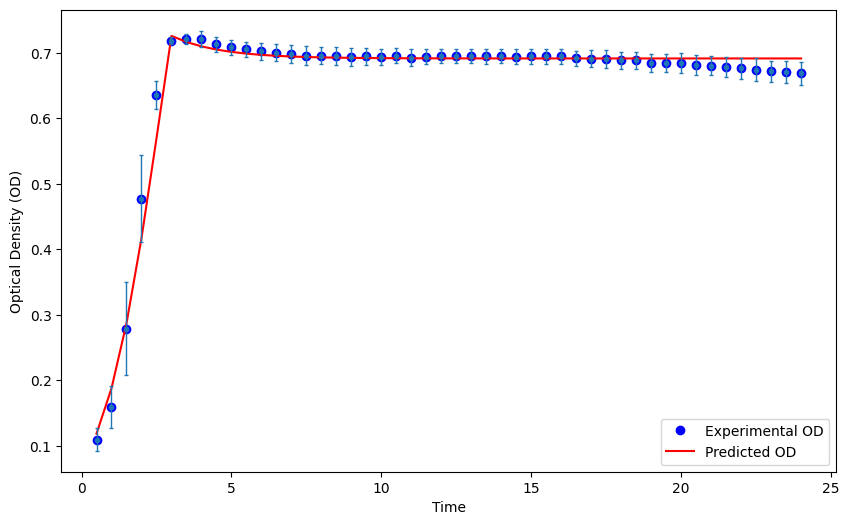

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

# Simulated data for demonstration
time_intervals = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16, 16.5, 17, 17.5, 18, 18.5, 19, 19.5, 20, 20.5, 21, 21.5, 22, 22.5, 23, 23.5, 24]  # time points
observed_OD = [0.10969167, 0.159375,   0.2791,     0.477175,   0.63509167,
  0.718225  , 0.72159167, 0.72138333, 0.71273333, 0.70850833, 0.7053,
  0.70224167, 0.69990833, 0.6981    , 0.69578333, 0.69571667, 0.695025,
  0.69365   , 0.69450833, 0.6935    , 0.695175  , 0.69266667, 0.69418333,
  0.69511667, 0.69545833, 0.69476667, 0.6947    , 0.6951    , 0.69376667,
  0.69466667, 0.69501667, 0.69463333, 0.69148333, 0.69120833, 0.69028333,
  0.68825833, 0.68820833, 0.68469167, 0.684525  , 0.68449167, 0.68124167,
  0.680075  , 0.677925  , 0.67609167, 0.674225  , 0.67176667, 0.67048333,
  0.668625  ]  # example OD values
sigmaOD = [0.01711392, 0.03179463, 0.07033579, 0.06604237, 0.02159518,
  0.00546744, 0.00751332, 0.01226494, 0.01135152, 0.01142354, 0.01129731,
  0.01256137, 0.01278141, 0.01321136, 0.01386184, 0.0128706 , 0.0130765,
  0.0135657 , 0.01272131, 0.01222642, 0.01150092, 0.0123932 , 0.01191911,
  0.01118805, 0.01060098, 0.01089348, 0.01118619, 0.01057708, 0.01160997,
  0.01172676, 0.01144376, 0.01110858, 0.01134699, 0.01351332, 0.01365675,
  0.01285574, 0.01290901, 0.01408406, 0.01411016, 0.01510758, 0.01537965,
  0.01472371, 0.01527429, 0.01662279, 0.01726953, 0.01618087, 0.01713629,
  0.01722768]  # example standard deviation for the OD values

# Stan model code as a string
stan_code = """
functions {
  vector logistic_growth(real t, vector y, real r, real kd, real K, real t_start_decay) {
    vector[1] dydt;
    real N = y[1];
    if (t >= t_start_decay) {
      dydt[1] = r * N * (1 - N / K) - kd * N;  // Including the decay term after t_start_decay
    } else {
      dydt[1] = r * N * (1 - N / K);  // Standard logistic growth before t_start_decay
    }
    return dydt;
  }
}

data {
  real t0;                 // Initial time in days
  vector[1] y_init;        // Initial state (initial OD converted to initial N)
  int<lower=1> N_t;        // Number of time points
  array[N_t] real times;   // Measurement times in days
  array[N_t] real ODm;     // Measured OD for cell density in CFU/mL
  array[N_t] real sigmaODm; // Measurement error for ODm at each time
  real<lower=0> t_start_decay; // Time at which decay starts
}

parameters {
  real<lower=0> r;        // Intrinsic growth rate
  real<lower=0> K;        // Carrying capacity (maximum population size)
  real<lower=0, upper=1> kd; // Decay rate, constrained between 0 and 1
}

model {
  // Priors
  r ~ normal(1.05, 0.01);
  K ~ normal(10^12, 10^11);  // Adjusted prior for K
  kd ~ beta(1, 5); // Prior for kd

  // ODE integration
  array[N_t] vector[1] mu_C = ode_bdf_tol(logistic_growth, y_init, t0,
                                          times, 1e-8, 1e-8, 1000, r, kd, K, t_start_decay);

  // Likelihood
  for (i in 1:N_t) {
    ODm[i] ~ normal(mu_C[i, 1], sigmaODm[i]);
  }
}

generated quantities {
  array[N_t] real y_rep;

  // ODE integration for predictions
  array[N_t] vector[1] mu_C_pred = ode_bdf_tol(logistic_growth, y_init, t0,
                                               times, 1e-8, 1e-8, 1000, r, kd, K, t_start_decay);

  // Extract predicted values
  for (i in 1:N_t) {
    y_rep[i] = mu_C_pred[i, 1];
  }
}
"""

# Save the Stan code to a file
with open('od_with_decay.stan', 'w') as file:
    file.write(stan_code)

# Compile the Stan model
model = CmdStanModel(stan_file='od_with_decay.stan')

# Set the time when decay starts
t_start_decay = 3.0  # For example, decay starts at day 6

# Define the data for Stan
stan_data = {
    't0': 0,
    'y_init': [0.073],
    'N_t': len(observed_OD),
    'times': time_intervals[:len(observed_OD)],
    'ODm': observed_OD,
    'sigmaODm': sigmaOD,
    't_start_decay': t_start_decay
}

# Fit the model
fit = model.sample(data=stan_data, iter_sampling=3000, iter_warmup=1000, chains=6, parallel_chains= 4)

# Extract the results
fit_r = fit.stan_variable('r').mean()
print(f'Fitted r: {fit_r}')

fit_K = fit.stan_variable('K').mean()
print(f'Fitted K: {fit_K}')

fit_kd = fit.stan_variable('kd').mean()
print(f'Fitted kd: {fit_kd}')
# Generate predictions using the fitted parameters
predicted_OD = fit.stan_variable('y_rep').mean(axis=0)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_intervals[:len(observed_OD)], observed_OD, 'bo', label='Experimental OD')
plt.plot(time_intervals[:len(observed_OD)], predicted_OD, 'r-', label='Predicted OD')
plt.errorbar(time_intervals[:len(observed_OD)], observed_OD, yerr=sigmaOD, fmt=".", elinewidth=1, capsize=1.2)
plt.xlabel('Time')
plt.ylabel('Optical Density (OD)')
plt.legend()
plt.show()


DEBUG:cmdstanpy:Removing /content/qcrispri
17:50:35 - cmdstanpy - INFO - compiling stan file /content/qcrispri.stan to exe file /content/qcrispri
INFO:cmdstanpy:compiling stan file /content/qcrispri.stan to exe file /content/qcrispri
DEBUG:cmdstanpy:cmd: make STANCFLAGS+=--filename-in-msg=qcrispri.stan /content/qcrispri
cwd: /root/.cmdstan/cmdstan-2.35.0
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc --filename-in-msg=qcrispri.stan --o=/content/qcrispri.hpp /content/qcrispri.stan

--- Compiling C++ code ---
g++ -std=c++17 -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes -Wno-class-memaccess      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.4.0 -I stan/lib/stan_math/lib/boost_1.84.0 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials    -DBOOST_DISABLE_A

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/qcrispri', 'id=2', 'random', 'seed=50723', 'data', 'file=/tmp/tmpakwqjj5g/sh7vi96y.json', 'output', 'file=/tmp/tmpakwqjj5g/qcrispri74d4e7j7/qcrispri-20241020175055_2.csv', 'method=sample', 'num_samples=700', 'num_warmup=300', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/qcrispri', 'id=1', 'random', 'seed=50723', 'data', 'file=/tmp/tmpakwqjj5g/sh7vi96y.json', 'output', 'file=/tmp/tmpakwqjj5g/qcrispri74d4e7j7/qcrispri-20241020175055_1.csv', 'method=sample', 'num_samples=700', 'num_warmup=300', 'algorithm=hmc', 'adapt', 'engaged=1']


18:28:39 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=2, chain_ids=[1, 2], num_processes=2
 cmd (chain 1):
	['/content/qcrispri', 'id=1', 'random', 'seed=50723', 'data', 'file=/tmp/tmpakwqjj5g/sh7vi96y.json', 'output', 'file=/tmp/tmpakwqjj5g/qcrispri74d4e7j7/qcrispri-20241020175055_1.csv', 'method=sample', 'num_samples=700', 'num_warmup=300', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpakwqjj5g/qcrispri74d4e7j7/qcrispri-20241020175055_1.csv
 console_msgs (if any):
	/tmp/tmpakwqjj5g/qcrispri74d4e7j7/qcrispri-20241020175055_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 700
    num_warmup = 300
    save_warmup = false (Default)
    thin = 1 (Default)
    adapt
      engaged = true (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)
      kappa = 0.75 (Default)
     

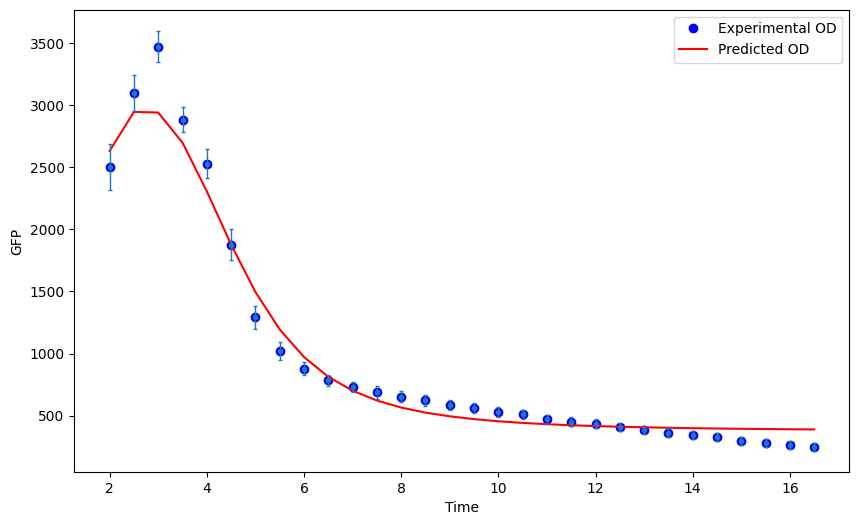

alpha_pl: Shape = (1400,)
alpha_rl: Shape = (1400,)
alpha_ra: Shape = (1400,)
alpha_g: Shape = (1400,)
nHill_A: Shape = (1400,)
nHill_c: Shape = (1400,)
Kd: Shape = (1400,)
KdCas: Shape = (1400,)
Kdeg_A: Shape = (1400,)
Kdeg_Cas: Shape = (1400,)
Kdeg_G: Shape = (1400,)
m1: Shape = (1400,)
c1: Shape = (1400,)
theta: Shape = (1400, 13)
y_hat: Shape = (1400, 30, 4)
y_pred: Shape = (1400, 30, 4)
y_rep: Shape = (1400, 30)


NameError: name 'lengths' is not defined

In [ ]:
#For GFP model Compilation

#import stan
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


First_code = """
functions {
  vector qcrispri_ode(real t, vector y, vector theta, real t_start_decay) {
    // Extract variables from the state vector y
    real AHL = y[1];
    real dCas9 = y[2];
    real GFP = y[3];
    real N = y[4];

    // Extract parameters from theta
    real alpha_pl = theta[1];
    real alpha_rl = theta[2];
    real alpha_ra = theta[3];
    real alpha_g = theta[4];
    real Kd = theta[5];
    real KdCas = theta[6];
    real Kdeg_A = theta[7];
    real Kdeg_Cas = theta[8];
    real Kdeg_G = theta[9];
    real m1 = theta[10];
    real c1 = theta[11];
    real nHill_A = theta[12];
    real nHill_c = theta[13];

    vector[4] dydt;

    // ODEs for the qCRISPRi system
    dydt[1] = (alpha_pl + alpha_rl + alpha_ra *(AHL^nHill_A) / ((Kd^nHill_A) + (AHL^nHill_A)))*(10^(-12))*nHill_A* N - Kdeg_A * AHL;
    dydt[2] = alpha_pl + alpha_rl + alpha_ra *(AHL^nHill_A) / ((Kd^nHill_A) + (AHL^nHill_A)) - Kdeg_Cas * dCas9;
    dydt[3] = m1 * (alpha_g * 0.1 + alpha_g * 0.9 * (KdCas^nHill_c) / ((KdCas^nHill_c) + (dCas9^nHill_c)) - Kdeg_G * GFP) + c1;
    if (t>t_start_decay){
    dydt[4] = 1.0788062183333331* N * (1 - N / 10^12)- 0.8449311801666667 * N;
    }
    else if (t<=t_start_decay){
    dydt[4] = 1.0788062183333331* N * (1 - N / 10^12);
    }  // Logistic growth for N

    return dydt;
  }
}

data {
  int<lower=1> T;                  // Number of time points
  real t0;                          // Initial time point
  real<lower=0> t_start_decay;      // Time point at which N starts decaying
  array[T] real ts;                       // Time points for observations
  vector[4] y0;              // Initial conditions for AHL, dCas9, GFP, N
  array[T] real GFP_data;                 // Observed GFP data
  array[T] real GFP_data_std;             // Standard deviation of GFP data
}


parameters {
  real<lower=0> alpha_pl;
  real<lower=0> alpha_rl;
  real<lower=10> alpha_ra;
  real<lower=100> alpha_g;
  real<lower=1> nHill_A;
  real<lower=1> nHill_c;
  real<lower=0> Kd;
  real<lower=0> KdCas;
  real<lower=0> Kdeg_A;
  real<lower=0> Kdeg_Cas;
  real<lower=0> Kdeg_G;
  real<lower=0> m1;
  real<lower=100> c1;
}

transformed parameters {
  vector[13] theta;                   // Parameter vector for the ODE solver
  theta[1] = alpha_pl;
  theta[2] = alpha_rl;
  theta[3] = alpha_ra;
  theta[4] = alpha_g;
  theta[5] = Kd;
  theta[6] = KdCas;
  theta[7] = Kdeg_A;
  theta[8] = Kdeg_Cas;
  theta[9] = Kdeg_G;
  theta[10] = m1;
  theta[11] = c1;
  theta[12] = nHill_A;
  theta[13] = nHill_c;

  array[T] vector[4] y_hat;                 // Model-predicted AHL, dCas9, GFP, N over time
  y_hat = ode_bdf_tol(qcrispri_ode, y0, t0, ts, 1e-8, 1e-8, 1000, theta, t_start_decay);
}

model {
  // Priors based on centered values
  alpha_pl ~ normal(0.5, 0.5);
  alpha_rl ~ normal(1, 0.5);
  alpha_ra ~ normal(60, 15);
  alpha_g ~ normal(250, 50);
  nHill_A ~ normal(1, 1);
  nHill_c ~ normal(1, 1);
  Kd ~ normal(40, 10);
  KdCas ~ normal(2, 1);
  Kdeg_A ~ normal(2, 1);
  Kdeg_Cas ~ normal(2, 1);
  Kdeg_G ~ normal(0.05, 0.05);
  m1 ~ normal(5, 2);
  c1 ~ normal(200, 50);

  // Likelihood
  for (t in 1:T) {
    GFP_data[t] ~ normal(y_hat[t, 3], GFP_data_std[t]);  // Likelihood for GFP data
  }
}

generated quantities {
  array[T] vector[4] y_pred;                // Posterior predictive values
  array[T] real y_rep;
  y_pred = ode_bdf_tol(qcrispri_ode, y0, t0, ts, 1e-8, 1e-8, 1000, theta, t_start_decay);
  for (i in 1:T) {
    y_rep[i] = y_pred[i, 3];
  }
}
"""

# Save the Stan code to a file
with open('qcrispri.stan', 'w') as file:
    file.write(First_code)


times=[2, 2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0,8.5,9.0,9.5,10.0,10.5,11.0,11.5,12.0,12.5,
13.0,13.5,14.0,14.5,15.0,15.5, 16,16.5]

T=len(times)

GFPm=[2499.932639,  3097.769014,
  3472.098263,  2884.223698 , 2528.507443,  1875.913667 , 1292.263367,
  1019.953655 ,  878.5377993 , 784.8161839,  731.5944037,  686.2606139,
   652.0724256,  622.3093502 , 584.7640632,  562.1380304,  526.7103399,
   511.2082341,  469.7655353,  451.5164133,  433.4286783,  408.04398,
   386.073282 ,  362.9843149,  341.8116799,  329.436376 ,  297.7418863,
   280.6564959,  260.5910852,  248.5686179]
sigmaGFPm= [185.1594904,  142.2711042,
  127.5736501 ,  99.22264166, 118.4520602 , 125.5941349 ,  90.99119545,
   69.77222991,  53.4117736 ,  45.05229549,  42.51437697,  48.88315132,
   43.31133657,  41.25548466,  42.32445316,  43.23621107,  39.08559645,
   37.56270881,  37.80751427,  38.03458106,  37.07719816,  34.79514567,
   34.07109887,  33.90218174,  32.31306575,  34.29242352,  31.89913472,
   30.76382903,  32.50894521,  31.35674229]

t_start_decay = 4.5

t1 = 1.5
#C0 = [0,0]
y_init2 = np.zeros(4)
y_init2[0] = 0
y_init2[1] = 0
y_init2[2] = 1726.752756
y_init2[3] = 10**7

Second_data = {"t0": t1,
                "y0": y_init2,
                "ts": times,
                "T": T,
                "GFP_data": GFPm,
                "GFP_data_std": sigmaGFPm,
                "t_start_decay": t_start_decay}

model = CmdStanModel(stan_file='qcrispri.stan')

# Sample from the posterior
fit2 = model.sample(data=Second_data, chains=2, parallel_chains=2, iter_warmup=300, iter_sampling=700)

'''posterior = stan.build(First_code, data=First_data)
fit = posterior.sample(num_chains=4, num_samples=1000)
# eta = fit["eta"]  # array with shape (8, 4000)'''

'''fit_K = fit.stan_variable('K').mean()
print(f'Fitted K: {fit_K}')'''

# Generate predictions using the fitted parameters
#predicted_GFP = fit.stan_variable('y_rep').mean(axis=0)
predicted_GFP2 = fit2.stan_variable('y_rep').mean(axis=0)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(times, GFPm, 'bo', label='Experimental OD')
#plt.plot(t_part1, predicted_GFP, 'r-', label='Predicted OD')
plt.plot(times, predicted_GFP2, 'r-', label='Predicted OD')
plt.errorbar(times, GFPm, yerr=sigmaGFPm, fmt=".", elinewidth=1, capsize=1.2)
plt.xlabel('Time')
plt.ylabel('GFP')
plt.legend()
plt.show()

'''variables = fit.stan_variables()

# Create a dictionary to hold all variables' data
data_dict = {var_name: fit.stan_variable(var_name) for var_name in variables}

# Check the shapes of all variables
for key, value in data_dict.items():
    print(f"{key}: Shape = {value.shape}")

# Exclude multi-dimensional arrays from the DataFrame
data_dict_filtered = {key: value.flatten() for key, value in data_dict.items() if value.ndim == 1}

# Verify that all arrays have the same length
lengths = [len(value) for value in data_dict_filtered.values()]
print(f"Array lengths after filtering: {set(lengths)}")

# Create the DataFrame
df = pd.DataFrame(data_dict_filtered)

# Display the DataFrame
print(df.head())
'''
variables2 = fit2.stan_variables()

# Create a dictionary to hold all variables' data
data_dict2 = {var_name: fit2.stan_variable(var_name) for var_name in variables2}

# Check the shapes of all variables
for key, value in data_dict2.items():
    print(f"{key}: Shape = {value.shape}")

# Exclude multi-dimensional arrays from the DataFrame
data_dict_filtered2 = {key: value.flatten() for key, value in data_dict2.items() if value.ndim == 1}

# Verify that all arrays have the same length
lengths2 = [len(value) for value in data_dict_filtered2.values()]
print(f"Array lengths after filtering: {set(lengths)}")

# Create the DataFrame
df2 = pd.DataFrame(data_dict_filtered2)

# Display the DataFrame
print(df2.head())

In [ ]:
fit_alpha0 = fit2.stan_variable('alpha_pl').mean()
print(f'Fitted alphal: {fit_alpha0}')

fit_alphaI = fit2.stan_variable('alpha_rl').mean()
print(f'Fitted alpha_rl: {fit_alphaI}')

fit_alphaR = fit2.stan_variable('alpha_ra').mean()
print(f'Fitted alpha_ra: {fit_alphaR}')

fit_alphaG = fit2.stan_variable('alpha_g').mean()
print(f'Fitted alpha_g: {fit_alphaG}')

k1R = fit2.stan_variable('nHill_A').mean()
print(f'Fitted nHill_A: {k1R}')

k2R = fit2.stan_variable('nHill_c').mean()
print(f'Fitted nHill_c: {k2R}')

fit_kcasR = fit2.stan_variable('Kd').mean()
print(f'Fitted Kd: {fit_kcasR}')

kd1 = fit2.stan_variable('KdCas').mean()
print(f'Fitted KdCas: {kd1}')

kd2 = fit2.stan_variable('Kdeg_A').mean()
print(f'Fitted Kdeg_A: {kd2}')

kdCas = fit2.stan_variable('Kdeg_Cas').mean()
print(f'Fitted Kdeg_Cas: {kdCas}')

dG = fit2.stan_variable('Kdeg_G').mean()
print(f'Fitted Kdeg_G: {dG}')

m = fit2.stan_variable('m1').mean()
print(f'Fitted m1: {m}')

c = fit2.stan_variable('c1').mean()
print(f'Fitted c1: {c}')

Fitted alphal: 0.4501990104335714
Fitted alpha_rl: 0.7339977293571428
Fitted alpha_ra: 60.01026642857142
Fitted alpha_g: 422.14149857142854
Fitted nHill_A: 1.7738638928571426
Fitted nHill_c: 3.4583741142857143
Fitted Kd: 39.89517635714286
Fitted KdCas: 2.8915386442857143
Fitted Kdeg_A: 2.0839019932142855
Fitted Kdeg_Cas: 0.03844452966035715
Fitted Kdeg_G: 0.13393947785714286
Fitted m1: 14.218516428571428
Fitted c1: 108.36835785714285


ValueError: x and y must have same first dimension, but have shapes (32,) and (25,)

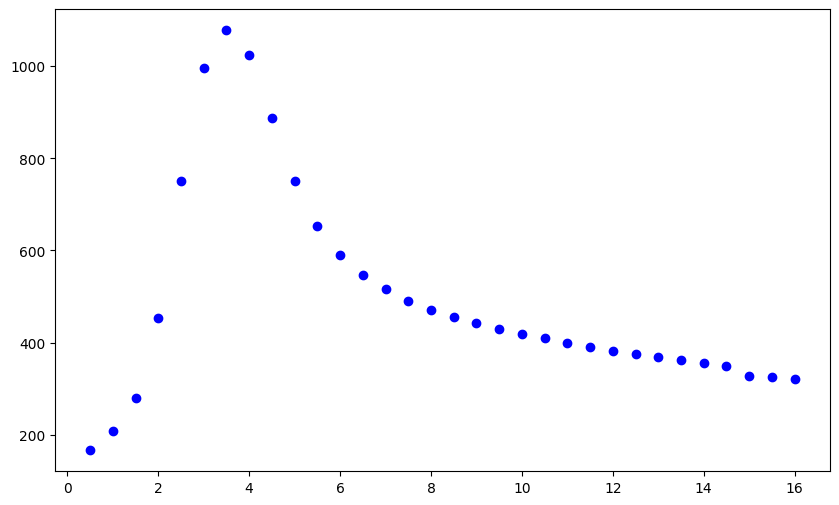

In [ ]:
# Generate predictions using the fitted parameters
predicted_GFP3 = fit2.stan_variable('y_rep').mean(axis=0)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(times, GFPm, 'bo', label='Experimental OD')
plt.plot(times, predicted_GFP3, 'r-', label='Predicted OD')
plt.errorbar(times, GFPm, yerr=sigmaGFPm, fmt=".", elinewidth=1, capsize=1.2)
plt.xlabel('Time')
plt.ylabel('GFP')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# Check the shapes of all variables
for key, value in data_dict.items():
    print(f"{key}: Shape = {value.shape}")

# Exclude multi-dimensional arrays from the DataFrame
data_dict_filtered = {key: value.flatten() for key, value in data_dict.items() if value.ndim == 1}

# Verify that all arrays have the same length
lengths = [len(value) for value in data_dict_filtered.values()]
print(f"Array lengths after filtering: {set(lengths)}")

# Create the DataFrame
df = pd.DataFrame(data_dict_filtered)

# Display the DataFrame
print(df.head())


alpha0: Shape = (1400,)
alphaI: Shape = (1400,)
alphaR: Shape = (1400,)
alphaG: Shape = (1400,)
k1R: Shape = (1400,)
k2R: Shape = (1400,)
kcasR: Shape = (1400,)
kd1: Shape = (1400,)
kd2: Shape = (1400,)
kdCas: Shape = (1400,)
dG: Shape = (1400,)
dR: Shape = (1400,)
dA: Shape = (1400,)
dCas: Shape = (1400,)
m: Shape = (1400,)
c1: Shape = (1400,)
c2: Shape = (1400,)
y_rep: Shape = (1400, 32)
mu_C_pred: Shape = (1400, 32, 10)
Array lengths after filtering: {1400}
     alpha0   alphaI   alphaR    alphaG      k1R       k2R     kcasR  \
0  0.004797  63.2481  25.9225   95.1194  38.0917   86.2682  105.4940   
1  0.032711  21.5711  21.7962  107.9270  26.1831  119.5000   54.6578   
2  0.005005  51.8534  26.5669  130.2490  76.8391   78.6027   87.6864   
3  0.011880  11.2669  16.7179  281.0920  20.3210  139.0970   71.0389   
4  0.001130  43.9184  27.2936   58.9011  73.9154   82.8793  118.0070   

        kd1        kd2    kdCas        dG        dR        dA      dCas  \
0   97.5855  104.30600  2.9

In [ ]:
df


,alpha0,alphaI,alphaR,alphaG,k1R,k2R,kcasR,kd1,kd2,kdCas,dG,dR,dA,dCas,m,c1,c2
0,0.004797,63.2481,25.92250,95.1194,38.0917,86.2682,105.4940,97.5855,104.30600,2.97667,0.523140,0.831111,0.003362,2.290790,0.027368,2.050800,10.43320
1,0.032711,21.5711,21.79620,107.9270,26.1831,119.5000,54.6578,242.5610,51.13370,3.12345,1.432510,2.135300,0.002127,1.009650,0.021598,2.665340,20.66540
2,0.005005,51.8534,26.56690,130.2490,76.8391,78.6027,87.6864,99.0961,112.48400,1.99764,2.030860,0.723303,0.008558,1.335220,0.018465,8.043810,18.67870
3,0.011880,11.2669,16.71790,281.0920,20.3210,139.0970,71.0389,154.5630,4.96755,2.24609,3.685240,3.502790,0.002219,1.387750,0.008728,0.924944,11.25750
4,0.001130,43.9184,27.29360,58.9011,73.9154,82.8793,118.0070,127.0220,78.00680,3.36137,0.384735,2.512900,0.003439,0.826829,0.042037,4.640200,17.24430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.005054,29.0721,7.48207,164.0030,29.2198,84.3955,75.3162,116.9140,24.96640,3.92006,2.466240,1.100530,0.007222,1.607990,0.017695,5.695690,7.32310
1396,0.011126,13.6278,21.96250,133.8850,55.9384,135.0440,100.6460,175.1870,17.01420,2.40700,1.974860,2.532090,0.003445,2.226250,0.015769,2.322160,23.26390
1397,0.007804,33.0954,10.87260,135.6160,39.7630,81.3520,55.3258,161.5000,41.34820,3.22030,2.254000,1.332320,0.003958,0.405655,0.021236,8.342680,10.25520
1398,0.011054,33.0822,11.15450,122.5370,42.8731,91.7992,43.9501,129.8980,52.07740,2.39416,2.206350,1.729770,0.005144,1.305140,0.021324,8.485320,16.57930


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from cmdstanpy import CmdStanModel

import numpy as np

# Extracting posterior samples
alpha0 = fit.stan_variable('alpha0')
alphaI = fit.stan_variable('alphaI')
alphaR = fit.stan_variable('alphaR')
alphaG = fit.stan_variable('alphaG')
k1R = fit.stan_variable('k1R')
k2R = fit.stan_variable('k2R')
kcasR = fit.stan_variable('kcasR')
kd1 = fit.stan_variable('kd1')
kd2 = fit.stan_variable('kd2')
kdCas = fit.stan_variable('kdCas')
dG = fit.stan_variable('dG')
dR = fit.stan_variable('dR')
dA = fit.stan_variable('dA')
dCas = fit.stan_variable('dCas')
m = fit.stan_variable('m')
c = fit.stan_variable('c')

from scipy.integrate import solve_ivp

def gfp_ode_system(t, y, alpha0, alphaI, alphaR, alphaG, k1R, k2R, kcasR, kd1, kd2, kdCas, dG, dR, dA, dCas, m, c):
    LuxR = y[0]
    dCas9 = y[1]
    A = y[2]
    LuxR_A = y[3]
    P0 = y[4]
    P1 = y[5]
    pC = y[6]
    pD = y[7]
    N = y[8]
    GFP = y[9]
    pT = 25  # nM

    dydt = np.zeros(10)
    dydt[0] = alphaR * pT - 2 * (k1R / kd1) * LuxR * A + 2 * k1R * LuxR_A - (1.3 + dR) * LuxR
    dydt[1] = alphaI * P1 + alpha0 * P0 - (1.3 + dCas) * dCas9 - (kcasR / kdCas) * dCas9 * pC + kcasR * pD
    dydt[2] = (alphaI * P1 + alpha0 * P0) * (1000) * (10**(-12)) * N + k1R * LuxR_A - (k1R / kd1) * LuxR * A - (1.3 + dA) * A
    dydt[3] = (k1R / kd1) * LuxR * A - k1R * LuxR_A - (k2R / kd2) * LuxR_A * P0 + k2R * P1 - (1.3 + dR) * LuxR_A
    dydt[4] = -(k2R / kd2) * LuxR_A * P0 + k2R * P1
    dydt[5] = (k2R / kd2) * LuxR_A * P0 - k2R * P1
    dydt[6] = -(kcasR / kdCas) * dCas9 * pC + kcasR * pD
    dydt[7] = (kcasR / kdCas) * dCas9 * pC - kcasR * pD
    dydt[8] = 1.7 * N * (1 - N / (10**12))
    dydt[9] = m * (alphaG * pC + alphaG * 0.1 * pD - (1.3 + dG) * GFP) + c

    return dydt


times = np.array(times)  # Make sure times are in an array

# Initialize arrays to store the predictions
gfp_predictions = []

# Loop over the posterior samples (for simplicity, using the first 100 samples)
for i in range(100):
    params = [
        alpha0[i], alphaI[i], alphaR[i], alphaG[i], k1R[i], k2R[i], kcasR[i],
        kd1[i], kd2[i], kdCas[i], dG[i], dR[i], dA[i], dCas[i], m[i], c[i]
    ]

    # Solve the ODE
    sol = solve_ivp(
        gfp_ode_system, [times[0], times[-1]], y_init, t_eval=times, args=tuple(params)
    )

    # Extract the GFP component (10th variable) and store it
    gfp_predictions.append(sol.y[9])  # GFP is the 10th variable (index 9)

gfp_predictions = np.array(gfp_predictions)

# Compute mean and credible intervals
gfp_mean = np.mean(gfp_predictions, axis=0)
gfp_lower = np.percentile(gfp_predictions, 2.5, axis=0)
gfp_upper = np.percentile(gfp_predictions, 97.5, axis=0)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(times, GFPm, 'o-', color='blue', label='Experimental GFP')
plt.plot(times, gfp_mean, 'o--', color='orange', label='Predicted GFP')
plt.fill_between(times, gfp_lower, gfp_upper, color='orange', alpha=0.3, label='95% CI')

plt.xlabel('Time (days)')
plt.ylabel('GFP')
plt.title('Comparison of Experimental and Predicted GFP Values')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from cmdstanpy import CmdStanModel

import numpy as np

# Extracting posterior samples
alpha0 = fit.stan_variable('alpha0')
alphaI = fit.stan_variable('alphaI')
alphaR = fit.stan_variable('alphaR')
alphaG = fit.stan_variable('alphaG')
k1R = fit.stan_variable('k1R')
k2R = fit.stan_variable('k2R')
kcasR = fit.stan_variable('kcasR')
kd1 = fit.stan_variable('kd1')
kd2 = fit.stan_variable('kd2')
kdCas = fit.stan_variable('kdCas')
dG = fit.stan_variable('dG')
dR = fit.stan_variable('dR')
dA = fit.stan_variable('dA')
dCas = fit.stan_variable('dCas')
m = fit.stan_variable('m')
c = fit.stan_variable('c')

from scipy.integrate import solve_ivp

def gfp_ode_system(t, y, alpha0, alphaI, alphaR, alphaG, k1R, k2R, kcasR, kd1, kd2, kdCas, dG, dR, dA, dCas, m, c):
    LuxR = y[0]
    dCas9 = y[1]
    A = y[2]
    LuxR_A = y[3]
    P0 = y[4]
    P1 = y[5]
    pC = y[6]
    pD = y[7]
    N = y[8]
    GFP = y[9]
    pT = 25  # nM

    dydt = np.zeros(10)
    dydt[0] = alphaR * pT - 2 * (k1R / kd1) * LuxR * A + 2 * k1R * LuxR_A - (1.3 + dR) * LuxR
    dydt[1] = alphaI * P1 + alpha0 * P0 - (1.3 + dCas) * dCas9 - (kcasR / kdCas) * dCas9 * pC + kcasR * pD
    dydt[2] = (alphaI * P1 + alpha0 * P0) * (1000) * (10**(-12)) * N + k1R * LuxR_A - (k1R / kd1) * LuxR * A - (1.3 + dA) * A
    dydt[3] = (k1R / kd1) * LuxR * A - k1R * LuxR_A - (k2R / kd2) * LuxR_A * P0 + k2R * P1 - (1.3 + dR) * LuxR_A
    dydt[4] = -(k2R / kd2) * LuxR_A * P0 + k2R * P1
    dydt[5] = (k2R / kd2) * LuxR_A * P0 - k2R * P1
    dydt[6] = -(kcasR / kdCas) * dCas9 * pC + kcasR * pD
    dydt[7] = (kcasR / kdCas) * dCas9 * pC - kcasR * pD
    dydt[8] = 1.7 * N * (1 - N / (10**12))
    dydt[9] = m * (alphaG * pC + alphaG * 0.1 * pD - (1.3 + dG) * GFP) + c

    return dydt


times = np.array(times)  # Make sure times are in an array

# Initialize arrays to store the predictions
gfp_predictions = []

# Loop over the posterior samples (for simplicity, using the first 100 samples)
for i in range(100):
    params = [
        alpha0[i], alphaI[i], alphaR[i], alphaG[i], k1R[i], k2R[i], kcasR[i],
        kd1[i], kd2[i], kdCas[i], dG[i], dR[i], dA[i], dCas[i], m[i], c[i]
    ]

    # Solve the ODE
    sol = solve_ivp(
        gfp_ode_system, [times[0], times[-1]], y_init, t_eval=times, args=tuple(params)
    )

    # Extract the GFP component (10th variable) and store it
    gfp_predictions.append(sol.y[9])  # GFP is the 10th variable (index 9)

gfp_predictions = np.array(gfp_predictions)

# Compute mean and credible intervals
gfp_mean = np.mean(gfp_predictions, axis=0)
gfp_lower = np.percentile(gfp_predictions, 2.5, axis=0)
gfp_upper = np.percentile(gfp_predictions, 97.5, axis=0)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(times, GFPm, 'o-', color='blue', label='Experimental GFP')
plt.plot(times, gfp_mean, 'o--', color='orange', label='Predicted GFP')
plt.fill_between(times, gfp_lower, gfp_upper, color='orange', alpha=0.3, label='95% CI')

plt.xlabel('Time (days)')
plt.ylabel('GFP')
plt.title('Comparison of Experimental and Predicted GFP Values')
plt.legend()
plt.grid(True)
plt.show()



KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract posterior means for the parameters
posterior_means = fit.summary().loc[['K', 'Tau'], 'Mean']
K_est = posterior_means['K']
Tau_est = posterior_means['Tau']

# Recompute modeled values (mu_C) using the estimated parameters
from scipy.integrate import odeint

def one_comp_mm_elim_abs(y, t, K, Tau):
    dydt = -y/Tau + K/Tau
    return dydt

# Initial condition
C0 = [5.5]

# Integrate the ODE using the estimated parameters
times = np.array(times)  # Ensure times is a numpy array
sol = odeint(one_comp_mm_elim_abs, C0, times, args=(K_est, Tau_est))

# Flatten the result since sol is a 2D array with one column
modeled_C = sol.flatten()

# Plot the experimental and modeled values
plt.figure(figsize=(10, 6))
plt.plot(times, C, 'bo-', label='Experimental (Observed)')
plt.plot(times, modeled_C, 'r--', label='Modeled')
plt.xlabel('Time (days)')
plt.ylabel('Concentration (mg/L)')
plt.title('Comparison of Experimental and Modeled Concentrations')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
bernoulli_stan = os.path.join(cmdstan_path(), 'examples', 'bernoulli', 'bernoulli.stan')
with open(bernoulli_stan, 'r') as fd:
        print('\n'.join(fd.read().splitlines()))

The data file `bernoulli.data.json` contains 10 observations, split between 2 successes (1) and 8 failures (0).

In [ ]:
bernoulli_data = os.path.join(cmdstan_path(), 'examples', 'bernoulli', 'bernoulli.data.json')
with open(bernoulli_data, 'r') as fd:
        print('\n'.join(fd.read().splitlines()))

The following code test that the CmdStanPy toolchain is properly installed by compiling the example model, fitting it to the data, and obtaining a summary of estimates of the posterior distribution of all parameters and quantities of interest.



In [ ]:
#For GFP model Compilation

#import stan
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


First_code = """
functions {
vector one_comp_mm_elim_abs(real t, vector y, real alpha0, real alphaI, real alphaR, real alphaG, real k1R, real k2R, real kcasR, real kd1, real kd2, real kdCas, real dG, real dR, real dA, real dCas, real m, real c, real t_start_decay) {
    vector[10] dydt;

    real LuxR = y[1];
    real dCas9 = y[2];
    real A = y[3];
    real LuxR_A = y[4];
    real P0 = y[5];
    real P1 = y[6];
    real pC = y[7];
    real pD = y[8];
    real N = y[9];
    real GFP = y[10];
    real pT=25; //nM


    if (t > t_start_decay) {
      dydt[1] = alphaR * pT - 2 * (k1R / kd1) * LuxR * A + 2 * k1R * LuxR_A - (1.3 + dR) * LuxR; // LuxR
      dydt[2] = alphaI * P1 + alpha0 * P0 - (1.3 + dCas) * dCas9 - (kcasR / kdCas) * dCas9 * pC + kcasR * pD; // dCas9
      dydt[3] = (alphaI * P1 + alpha0 * P0) * (1000) * (10^(-12)) * N + 2*k1R * LuxR_A - 2*(k1R / kd1) * LuxR * A - (1.3 + dA) * A; // AHL
      dydt[4] = (k1R / kd1) * LuxR * A - k1R * LuxR_A - (k2R / kd2) * LuxR_A * P0 + k2R * P1 - (1.3 + dR) * LuxR_A; // LuxR_A
      dydt[5] = -(k2R / kd2) * LuxR_A * P0 + k2R * P1; // P0 Inactive promoter (basal/leaky expression)
      dydt[6] = (k2R / kd2) * LuxR_A * P0 - k2R * P1; // P1 Active promoter (LuxR:AHL activated)
      dydt[7] = -(kcasR / kdCas) * dCas9 * pC + kcasR * pD; // pC - Constitutive promoter
      dydt[8] = (kcasR / kdCas) * dCas9 * pC - kcasR * pD; // pD - dCas9 bound repressed promoter
      dydt[9] = 1.0406263716666666 * N * (1 - N / 10^12) - 0.5848486755555556 * N;  // Including the decay term after t_start_decay
      dydt[10] = m * (alphaG * pC + alphaG * 0.1 * pD - (1.3 + dG) * GFP) + c; // GFP Cas9 repressed
    } else if(t<= t_start_decay) {
      dydt[1] = alphaR * pT - 2 * (k1R / kd1) * LuxR * A + 2 * k1R * LuxR_A - (1.3 + dR) * LuxR; // LuxR
      dydt[2] = alphaI * P1 + alpha0 * P0 - (1.3 + dCas) * dCas9 - (kcasR / kdCas) * dCas9 * pC + kcasR * pD; // dCas9
      dydt[3] = (alphaI * P1 + alpha0 * P0) * (1000) * (10^(-12)) * N + 2*k1R * LuxR_A - 2*(k1R / kd1) * LuxR * A - (1.3 + dA) * A; // AHL
      dydt[4] = (k1R / kd1) * LuxR * A - k1R * LuxR_A - (k2R / kd2) * LuxR_A * P0 + k2R * P1 - (1.3 + dR) * LuxR_A; // LuxR_A
      dydt[5] = -(k2R / kd2) * LuxR_A * P0 + k2R * P1; // P0 Inactive promoter (basal/leaky expression)
      dydt[6] = (k2R / kd2) * LuxR_A * P0 - k2R * P1; // P1 Active promoter (LuxR:AHL activated)
      dydt[7] = -(kcasR / kdCas) * dCas9 * pC + kcasR * pD; // pC - Constitutive promoter
      dydt[8] = (kcasR / kdCas) * dCas9 * pC - kcasR * pD; // pD - dCas9 bound repressed promoter
      dydt[9] = 1.0406263716666666 * N * (1 - N / 10^12);  // Standard logistic growth before t_start_decay
      dydt[10] = m * (alphaG * pC + alphaG * 0.1 * pD - (1.3 + dG) * GFP) + c; // GFP Cas9 repressed
    }


    return dydt;
      }
}

data {
    real t0; // Initial time in days;
    real<lower=0> t_start_decay; // Time at which decay starts
    vector[10] y_init;  // Initial state
    int<lower=1> N_t;
    array[N_t] real times;  // Measurement times in days
//    array[N_t] real ODm;    // Measured OD for cell density in CFU/mL
    array[N_t] real GFPm;    // Measured GFP for Cas9 repressed
//    array[N_t] real sigmaODm; // Measurement error for ODm at each time
    array[N_t] real sigmaGFPm; // Measurement error for GFPm at each time

 }

parameters {
    real<lower=0> alpha0;
    real<lower=0> alphaI;
    real<lower=0> alphaR;
    real<lower=0> alphaG;
    real<lower=0> k1R;
    real<lower=0> k2R;
    real<lower=0> kcasR;
    real<lower=0> kd1;
    real<lower=0> kd2;
    real<lower=0> kdCas;
    real<lower=0> dG;
    real<lower=0> dR;
    real<lower=0> dA;
    real<lower=0> dCas;
    real<lower=0> m;
    real<lower=0> c;
    //real<lower=0> K;
 }
transformed parameters {

 }
model {
   // Priors
    alpha0 ~ normal(0.450, 0.175);
    alphaI ~ normal(20, 15);
    alphaR ~ normal(15, 10);
    alphaG ~ normal(130, 75);  // Updated: Mean = 75, Half of Range = 75
    k1R ~ normal(30, 30);   // Updated: Mean = 225, Half of Range = 125
    k2R ~ normal(80, 50);
    kcasR ~ normal(70, 40);
    kd1 ~ normal(150, 40);
    kd2 ~ normal(100, 80);  // Updated: Mean = 1.25, Half of Range = 0.75
    kdCas ~ normal(2, 2);      // Updated: Mean = 1, Half of Range = 1
    dG ~ normal(2, 2); // Updated: Mean = 12.75, Half of Range = 12.25
    dR ~ normal(2, 2);
    dA ~ normal(0.0045, 0.002);
    dCas ~ normal(1, 1);
    m ~ normal(0.8, 0.8);
   // K ~ normal(10^12, 10^11);  // Adjusted prior for K
    c ~ normal(200, 50);




      array[N_t] vector[10] mu_C = ode_bdf_tol(one_comp_mm_elim_abs, y_init, t0,
                                          times, 1e-8, 1e-8, 1000, alpha0, alphaI, alphaR, alphaG, k1R, k2R, kcasR, kd1, kd2, kdCas, dG, dR, dA, dCas, m, c, t_start_decay);

  // Likelihood


for (i in 1:N_t) {
//    ODm[i] ~ normal(mu_C[i , 9], sigmaODm[i]);
    GFPm[i] ~ normal(mu_C[i , 10], sigmaGFPm[i]);
}

}

generated quantities {
   array[N_t] real y_rep;

  // ODE integration for predictions
  array[N_t] vector[10] mu_C_pred = ode_bdf_tol(one_comp_mm_elim_abs, y_init, t0,
                                          times, 1e-8, 1e-8, 1000, alpha0, alphaI, alphaR, alphaG, k1R, k2R, kcasR, kd1, kd2, kdCas, dG, dR, dA, dCas, m, c, t_start_decay);

  // Extract predicted values
  for (i in 1:N_t) {
    y_rep[i] = mu_C_pred[i, 10];
  }

}

"""

# Save the Stan code to a file
with open('qcrispri.stan', 'w') as file:
    file.write(First_code)

t0 = 0
#C0 = [0,0]
y_init = np.zeros(10)
y_init[4] = 25
y_init[6] = 25
y_init[8] = 10**7
y_init[9] = 159.788
#y_init= [0, 0, 0, 0, 25, 0, 25, 0, 10**7, 1000]


#times = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10]
# C = [5.70812264865215]
#N_t = 20
#GFPm = [5.70812264865215, 7.10126075072086, 8.38520678426651, 9.79008249883381, 10.4390409239245, 11.4478987597702, 11.2124282696837, 11.4269217682577, 12.2432859438401, 13.8201804108938, 13.8408670746042, 11.422291744251, 10.5031943081843, 11.9121452242965, 14.0849980781312, 10.5505145523917, 10.1905539351877, 12.2232272590821, 11.7290653047821, 12.2719396535996]
#ODm = [5.70812264865215, 7.10126075072086, 8.38520678426651, 9.79008249883381, 10.4390409239245, 11.4478987597702, 11.2124282696837, 11.4269217682577, 12.2432859438401, 13.8201804108938, 13.8408670746042, 11.422291744251, 10.5031943081843, 11.9121452242965, 14.0849980781312, 10.5505145523917, 10.1905539351877, 12.2232272590821, 11.7290653047821, 12.2719396535996]
#sigmaODm = [0.570812264865215, 0.710126075072086, 0.838520678426651, 0.979008249883381, 1.04390409239245, 1.14478987597702, 1.12124282696837, 1.14269217682577, 1.22432859438401, 1.38201804108938, 1.38408670746042, 1.1422291744251, 1.05031943081843, 1.19121452242965, 1.40849980781312, 1.05505145523917, 1.01905539351877, 1.22232272590821, 1.17290653047821, 1.22719396535996]
#sigmaGFPm = [0.570812264865215, 0.710126075072086, 0.838520678426651, 0.979008249883381, 1.04390409239245, 1.14478987597702, 1.12124282696837, 1.14269217682577, 1.22432859438401, 1.38201804108938, 1.38408670746042, 1.1422291744251, 1.05031943081843, 1.19121452242965, 1.40849980781312, 1.05505145523917, 1.01905539351877, 1.22232272590821, 1.17290653047821, 1.22719396535996]

times=[2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0,8.5,9.0,9.5,10.0,10.5,11.0,11.5,12.0,12.5,
13.0,13.5,14.0,14.5,15.0,15.5, 16]

N_t=len(times)

GFPm=[  750.7875,     996.7208333,
  1077.9875,    1024.354167,   888.1208333,  750.5541667,  653.2875,
   589.6875,     545.7875,     515.3208333,  490.7875 ,    471.5208333,
   455.2541667,  441.9875,     429.2208333,  418.7875  ,   409.1875,
   399.5208333,  390.5208333,  382.5541667,  375.3208333,  368.7208333,
   361.8208333,  355.8208333,  349.8875,     327.7541667,  325.5875,
   320.5208333]
sigmaGFPm= [ 76.10670506
 ,151.6759338
 ,171.4411707
 ,153.984983
 ,114.8562266
 , 83.48165134
 , 66.43601767
 , 57.73262124
 , 54.90694148
 , 55.51994136
 , 56.67397012
 , 57.15378864
 , 58.2521578
 , 58.53695414
 , 58.77256068
 , 58.89923127
 , 59.21570738
 , 58.83640219
 , 59.53232082
 , 59.22279028
 , 59.96415596
 , 60.62629151
 , 60.48592582
 , 61.07866058
 , 60.47834782
 , 57.74532208
 , 60.29183656
 , 61.17540809]

'''split_index = 3
data_part1 = GFPm[:split_index]
data_part2 = GFPm[split_index:]
SDV_part1 = sigmaGFPm[:split_index]
SDV_part2 = sigmaGFPm[split_index:]

t_part1 = times[:split_index]
t_part2 = times[split_index:]

data_part1, data_part2'''


'''GFPm=[509.3333333,657.3333333,748.6666667,889.6666667,1001.333333,1213,1468.666667,1639.666667,1834.333333,
2040.333333,2255.666667,2447.333333,2650,2839.666667,3053.666667,3218.333333,3386,3510,3596.333333,3634,3657,3651,3622,
3604.666667,3541.333333,3451,3359.666667,3259.666667,3149.666667,3055.666667,2949.333333,2860,2781.666667,2709.666667,
2647.666667,2610.666667,2560.333333,2506,2449,2396.333333]
sigmaGFPm=[19.3993127, 23.71356855, 25.54081701, 30.36994128, 28.93671255, 45.57411546, 89.31032042, 158.7524278, 282.5426222, 447.593938, 648.7421162, 845.6206793, 1065.177919, 1273.621739, 1490.028635, 1664.321584, 1835.707765, 1957.667234, 2018.255765, 1994.648089, 1970.482428, 1904.163596, 1832.372233, 1753.931679, 1634.42416, 1493.401821, 1356.516617, 1227.786762, 1077.104606, 980.5938677, 861.2237417, 768.8608457, 701.8549233, 633.5813549, 590.6236817, 549.1897061, 535.0003115, 516.186013, 515.5550407, 496.2270985]'''
#import experimental data
#data = pd.read_excel('/Users/rmahadevan/Library/CloudStorage/OneDrive-UniversityofToronto/GroupDocs/Research Projects/QCRISPR2/Quorum_Switch-main/data/qCRISPRi_wildVSmutant_130221_cleaned.xlsx')
#times=data.time
#Nt=len(data.time)
#GFPm=data.avgwildgfp
#sigmaGFPm=data.stdwildgfp
#GFPm=np.reshape(data.avgwildgfp, (Nt,1))
#sigmaGFPm=np.reshape(data.stdwildgfp, (Nt,1))

t_start_decay = 3.5


'''First_data = {"t0": t0,
                "y_init": y_init,
                "times": t_p,
                "N_t": 3,
                "GFPm": data_part1,
                "sigmaGFPm": SDV_part1,
                "t_start_decay": t_start_decay}

model = CmdStanModel(stan_file='qcrispri.stan')

# Sample from the posterior
fit = model.sample(data=First_data, chains=2, parallel_chains=2, iter_warmup=300, iter_sampling=700)'''

t1 = 2.0
#C0 = [0,0]
y_init2 = np.zeros(10)
y_init2[4] = 25
y_init2[6] = 25
y_init2[8] = 10**7
y_init2[9] = 452.4875

Second_data = {"t0": t1,
                "y_init": y_init2,
                "times": times,
                "N_t": N_t,
                "GFPm": GFPm,
                "sigmaGFPm": sigmaGFPm,
                "t_start_decay": t_start_decay}

model = CmdStanModel(stan_file='qcrispri.stan')

# Sample from the posterior
fit2 = model.sample(data=Second_data, chains=2, parallel_chains=2, iter_warmup=300, iter_sampling=700)

'''posterior = stan.build(First_code, data=First_data)
fit = posterior.sample(num_chains=4, num_samples=1000)
# eta = fit["eta"]  # array with shape (8, 4000)'''

'''fit_K = fit.stan_variable('K').mean()
print(f'Fitted K: {fit_K}')'''

# Generate predictions using the fitted parameters
#predicted_GFP = fit.stan_variable('y_rep').mean(axis=0)
predicted_GFP2 = fit2.stan_variable('y_rep').mean(axis=0)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(times, GFPm, 'bo', label='Experimental OD')
#plt.plot(t_part1, predicted_GFP, 'r-', label='Predicted OD')
plt.plot(times, predicted_GFP2, 'r-', label='Predicted OD')
plt.errorbar(times, GFPm, yerr=sigmaGFPm, fmt=".", elinewidth=1, capsize=1.2)
plt.xlabel('Time')
plt.ylabel('GFP')
plt.legend()
plt.show()

'''variables = fit.stan_variables()

# Create a dictionary to hold all variables' data
data_dict = {var_name: fit.stan_variable(var_name) for var_name in variables}

# Check the shapes of all variables
for key, value in data_dict.items():
    print(f"{key}: Shape = {value.shape}")

# Exclude multi-dimensional arrays from the DataFrame
data_dict_filtered = {key: value.flatten() for key, value in data_dict.items() if value.ndim == 1}

# Verify that all arrays have the same length
lengths = [len(value) for value in data_dict_filtered.values()]
print(f"Array lengths after filtering: {set(lengths)}")

# Create the DataFrame
df = pd.DataFrame(data_dict_filtered)

# Display the DataFrame
print(df.head())
'''
variables2 = fit2.stan_variables()

# Create a dictionary to hold all variables' data
data_dict2 = {var_name: fit2.stan_variable(var_name) for var_name in variables2}

# Check the shapes of all variables
for key, value in data_dict2.items():
    print(f"{key}: Shape = {value.shape}")

# Exclude multi-dimensional arrays from the DataFrame
data_dict_filtered2 = {key: value.flatten() for key, value in data_dict2.items() if value.ndim == 1}

# Verify that all arrays have the same length
lengths2 = [len(value) for value in data_dict_filtered2.values()]
print(f"Array lengths after filtering: {set(lengths)}")

# Create the DataFrame
df2 = pd.DataFrame(data_dict_filtered2)

# Display the DataFrame
print(df2.head())

06:57:25 - cmdstanpy - INFO - compiling stan file /content/qcrispri.stan to exe file /content/qcrispri
INFO:cmdstanpy:compiling stan file /content/qcrispri.stan to exe file /content/qcrispri
DEBUG:cmdstanpy:cmd: make STANCFLAGS+=--filename-in-msg=qcrispri.stan /content/qcrispri
cwd: /root/.cmdstan/cmdstan-2.35.0


KeyboardInterrupt: 

In [ ]:
# Run CmdStanPy Hello, World! example
from cmdstanpy import cmdstan_path, CmdStanModel

# Compile example model bernoulli.stan
bernoulli_model = CmdStanModel(stan_file=bernoulli_stan)

# Condition on example data bernoulli.data.json
bern_fit = bernoulli_model.sample(data=bernoulli_data, seed=123)

# Print a summary of the posterior sample
bern_fit.summary()